<br>

# Data Product with Machine Learning
#### Assessment task 3

<br>
<hr>

> AGUSTIN FERRARI

>24704114

>NOVEMBER 2023

>ADVANCED MACHINE LEARNING

>UNIVERSITY TECHNOLOGY SYDNEY


<hr>

<br>


## Importing Libraries

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import joblib
import zipfile
import os
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor

## Loading dataset

a sample of 20% of the dataset

In [94]:

# Filename where the dataset is stored
filename = r"C:\Users\ferra\OneDrive\Escritorio\Master Of Data Science\Advance Machine Learning\Advanced_ML_Ass3\Data\df.joblib"

# Load the dataset into df
df = joblib.load(filename)


In [95]:
df.head()

,searchDate,DepartureDate,startingAirport,destinationAirport,totalFare,isRefundable,DepartureTime,coach,business,premium coach,first,numSegments,searchDayOfWeek,searchMonth,searchYear,DepartureDateDayOfWeek,DepartureDateMonth,DepartureDateYear,daysInAdvance
0,2022-04-23,2022-05-30,MIA,ATL,667.6,False,15:00,1.0,0.0,0.0,0.0,2,5,4,2022,0,5,2022,37
1,2022-04-16,2022-04-24,ATL,BOS,625.2,False,08:20,1.0,0.0,0.0,0.0,3,5,4,2022,6,4,2022,8
2,2022-04-24,2022-05-18,DEN,SFO,369.6,False,14:23,1.0,0.0,0.0,0.0,2,6,4,2022,2,5,2022,24
3,2022-04-25,2022-06-16,DTW,JFK,597.1,False,06:00,1.0,0.0,0.0,0.0,3,0,4,2022,3,6,2022,52
4,2022-04-18,2022-04-25,IAD,ATL,199.1,False,13:50,1.0,0.0,0.0,0.0,2,0,4,2022,0,4,2022,7


In [96]:

# Display shape
df.shape


(135008, 19)

In [97]:

# Drop Year columns
df = df.drop(["searchDate","DepartureDate","searchYear","DepartureDateYear"],axis=1)


## isRefundable datatype

In [98]:
df["isRefundable"] = df.isRefundable.astype(int)

## One hot encoding for airport categories

In [99]:

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['startingAirport', 'destinationAirport'])

# Head
df.head()


,totalFare,isRefundable,DepartureTime,coach,business,premium coach,first,numSegments,searchDayOfWeek,searchMonth,...,destinationAirport_EWR,destinationAirport_IAD,destinationAirport_JFK,destinationAirport_LAX,destinationAirport_LGA,destinationAirport_MIA,destinationAirport_OAK,destinationAirport_ORD,destinationAirport_PHL,destinationAirport_SFO
0,667.6,0,15:00,1.0,0.0,0.0,0.0,2,5,4,...,0,0,0,0,0,0,0,0,0,0
1,625.2,0,08:20,1.0,0.0,0.0,0.0,3,5,4,...,0,0,0,0,0,0,0,0,0,0
2,369.6,0,14:23,1.0,0.0,0.0,0.0,2,6,4,...,0,0,0,0,0,0,0,0,0,1
3,597.1,0,06:00,1.0,0.0,0.0,0.0,3,0,4,...,0,0,1,0,0,0,0,0,0,0
4,199.1,0,13:50,1.0,0.0,0.0,0.0,2,0,4,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df.columns

Index(['totalFare', 'isRefundable', 'DepartureTime', 'coach', 'business',
       'premium coach', 'first', 'numSegments', 'searchDayOfWeek',
       'searchMonth', 'DepartureDateDayOfWeek', 'DepartureDateMonth',
       'daysInAdvance', 'startingAirport_ATL', 'startingAirport_BOS',
       'startingAirport_CLT', 'startingAirport_DEN', 'startingAirport_DFW',
       'startingAirport_DTW', 'startingAirport_EWR', 'startingAirport_IAD',
       'startingAirport_JFK', 'startingAirport_LAX', 'startingAirport_LGA',
       'startingAirport_MIA', 'startingAirport_OAK', 'startingAirport_ORD',
       'startingAirport_PHL', 'startingAirport_SFO', 'destinationAirport_ATL',
       'destinationAirport_BOS', 'destinationAirport_CLT',
       'destinationAirport_DEN', 'destinationAirport_DFW',
       'destinationAirport_DTW', 'destinationAirport_EWR',
       'destinationAirport_IAD', 'destinationAirport_JFK',
       'destinationAirport_LAX', 'destinationAirport_LGA',
       'destinationAirport_MIA', 'destina

## DepartureTime to minutes of day

In [101]:

# Function to convert time to numeric format
def time_to_numeric(time_string):
    hours, minutes = map(int, time_string.split(':'))
    return hours + minutes/60

# Apply the conversion function
df['DepartureTime'] = df['DepartureTime'].apply(time_to_numeric)


## Splitting into X and Y

In [102]:

# Split X and Y
X = df.drop('totalFare', axis=1)  # Features
Y = df['totalFare']  # Target variable


## Standardisation

In [103]:

# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:

# Save the model using joblib
scaler.dump(best_xgb_model, r'C:\Users\ferra\OneDrive\Escritorio\Master Of Data Science\Advance Machine Learning\Advanced_ML_Ass3\Models\scaler.pkl')


## Splitting into train and testing

In [104]:

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Agustin's models

## Baseline model

In [105]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate the mean of the target variable
Y_mean = np.mean(Y_train)

# Generate predictions using the mean
Y_pred_baseline = np.full_like(Y_test, fill_value=Y_mean)

# Calculate the baseline MSE and RMSE
baseline_mse = mean_squared_error(Y_test, Y_pred_baseline)
baseline_rmse = np.sqrt(baseline_mse)

# Display the baseline MSE and RMSE rounded to the nearest whole number
print("Baseline Model MSE:", round(baseline_mse))
print("Baseline Model RMSE:", round(baseline_rmse))


Baseline Model MSE: 41820
Baseline Model RMSE: 204


## Linear Model

In [106]:
from sklearn.metrics import mean_squared_error

def evaluate_model(X_train, X_test, Y_train, Y_test, model, hyperparameter_dictionary):
    model_instance = model(**hyperparameter_dictionary)
    model_instance.fit(X_train, Y_train)

    Y_pred = model_instance.predict(X_test)
    print("_________________________________________________________________________________")
    print("\n")
    print(f'Results for ({model.__name__})')
    print("\n")
    print("_________________________________________________________________________________")
    print("\n")
    
    # Create a scatter plot for predicted versus real values
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_test, Y_pred, color='grey', label='Predicted vs Real', alpha=0.7)
    plt.plot(Y_test, Y_test, color='orange', label='Prediction Line', linewidth=2, linestyle='dashed')
    plt.xlabel('Real Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Predicted vs Real Values ({model.__name__})', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
    plt.show()

    # Perform cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_predict(model_instance, np.concatenate((X_train, X_test), axis=0), np.concatenate((Y_train, Y_test), axis=0), cv=kf, n_jobs=-1)

    cv_mse = mean_squared_error(np.concatenate((Y_train, Y_test), axis=0), cv_results)
    cv_rmse = np.sqrt(cv_mse)

    print("_________________________________________________________________________________")
    print("\n")

    print(f"Test Squared Error (MSE) ({model.__name__}):", round(cv_mse, 2))
    print("\n")
    print(f"Test Root Mean Squared Error (RMSE) ({model.__name__}):", round(cv_rmse, 2))

    print("\n")

    # Calculate and print Train MSE and RMSE
    train_mse = mean_squared_error(Y_train, model_instance.predict(X_train))
    train_rmse = np.sqrt(train_mse)

    print(f"Train Mean Squared Error (MSE) ({model.__name__}):", round(train_mse, 2))
    print("\n")
    print(f"Train Root Mean Squared Error (RMSE) ({model.__name__}):", round(train_rmse, 2))
    print("\n")
    print("_________________________________________________________________________________")


_________________________________________________________________________________


Results for (LinearRegression)


_________________________________________________________________________________




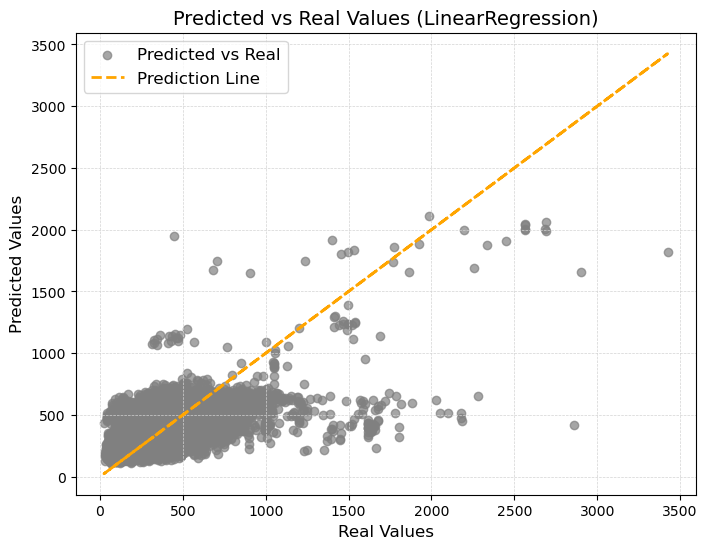

_________________________________________________________________________________


Test Squared Error (MSE) (LinearRegression): 25246.05


Test Root Mean Squared Error (RMSE) (LinearRegression): 158.89


Train Mean Squared Error (MSE) (LinearRegression): 25195.1


Train Root Mean Squared Error (RMSE) (LinearRegression): 158.73


_________________________________________________________________________________


In [107]:
from sklearn.linear_model import LinearRegression

# Assuming X_train, X_test, Y_train, Y_test are defined

hyperparameter_dictionary = {}  # Empty dictionary for no regularization

# Call the function for Linear Regression
evaluate_model(X_train, X_test, Y_train, Y_test, LinearRegression, hyperparameter_dictionary)


The model is clearly biased as next step will be paramount to increase flexibility

## Linear Model - Log of totalFare

Transforming totalFare closer to normality

_________________________________________________________________________________


Train Mean Squared Error: 26952.74


Train Root Mean Squared Error: 164.17


_________________________________________________________________________________


Test Mean Squared Error: 26867.85


Test Root Mean Squared Error: 163.91


_________________________________________________________________________________


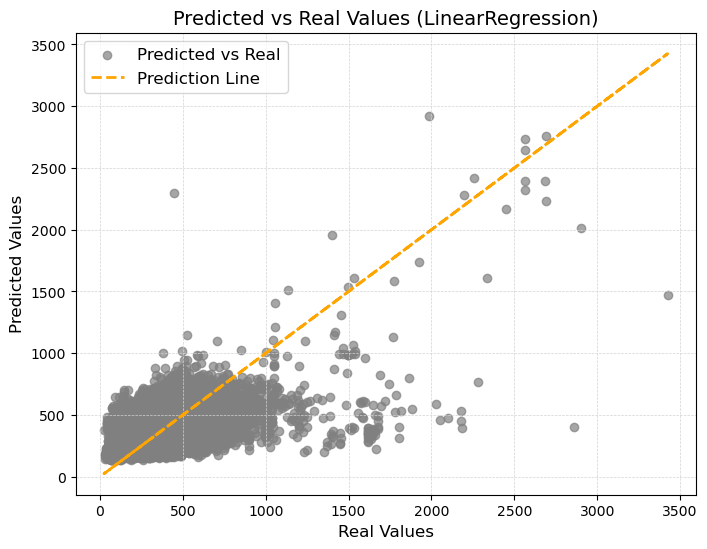

In [108]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def evaluate_model_log(X_train, X_test, Y_train, Y_test, model, hyperparameter_dictionary):
    model_instance = model(**hyperparameter_dictionary)
    model_instance.fit(X_train, np.log(Y_train))  # Fitting the model using the log of Y_train

    # Predicting the values and taking the exponential to get the original scale for both train and test data
    Y_train_pred = np.exp(model_instance.predict(X_train))
    Y_test_pred = np.exp(model_instance.predict(X_test))

    # Compute train and test MSE and RMSE
    train_mse = mean_squared_error(Y_train, Y_train_pred)
    test_mse = mean_squared_error(Y_test, Y_test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    # Round to two decimal places
    train_mse_rounded = round(train_mse, 2)
    test_mse_rounded = round(test_mse, 2)

    train_rmse_rounded = round(train_rmse, 2)
    test_rmse_rounded = round(test_rmse, 2)

    # Display the evaluation metrics
    print("_________________________________________________________________________________")
    print("\n")
    print("Train Mean Squared Error:", train_mse_rounded)
    print("\n")
    print("Train Root Mean Squared Error:", train_rmse_rounded)
    print("\n")
    print("_________________________________________________________________________________")
    print("\n")
    print("Test Mean Squared Error:", test_mse_rounded)
    print("\n")    
    print("Test Root Mean Squared Error:", test_rmse_rounded)
    print("\n")
    print("_________________________________________________________________________________")
    
    # Create a scatter plot for predicted versus real values
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_test, Y_test_pred, color='grey', label='Predicted vs Real', alpha=0.7)
    plt.plot(Y_test, Y_test, color='orange', label='Prediction Line', linewidth=2, linestyle='dashed')
    plt.xlabel('Real Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Predicted vs Real Values ({model.__name__})', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
    plt.show()
# Call the function for Lasso
evaluate_model_log(X_train, X_test, Y_train, Y_test, LinearRegression, hyperparameter_dictionary)

## Linear Model - GLM - Gamma Distribution

Experimenting on GLM - Gamma Distribution giving flexibility to adapt to the not normal distribution of the target variable

C:\Users\ferra\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


_________________________________________________________________________________


Train Mean Squared Error: 25808.78


Train Root Mean Squared Error: 160.65


_________________________________________________________________________________


Test Mean Squared Error: 25932.71


Test Root Mean Squared Error: 161.04


_________________________________________________________________________________


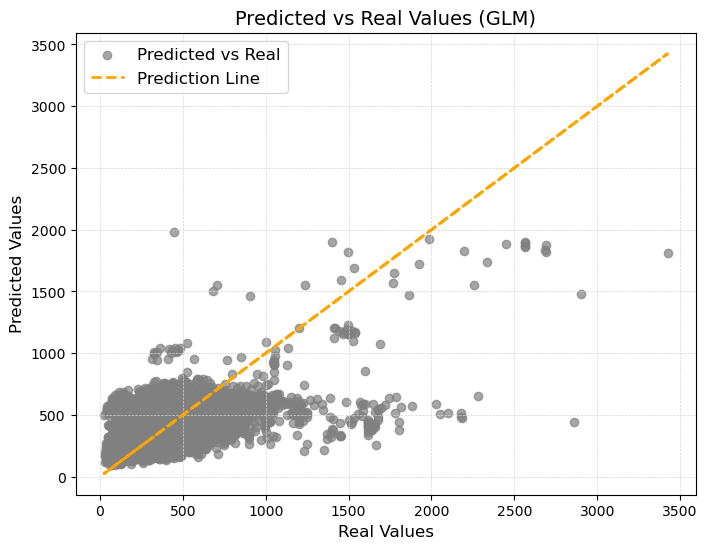

In [109]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def train_glm(X_train, X_test, Y_train, Y_test):
    X_train = sm.add_constant(X_train)  # Add a constant term to the features
    X_test = sm.add_constant(X_test)  # Add a constant term to the test set

    # Fit the GLM with the gamma distribution
    gamma_link = sm.families.links.identity()
    gamma_family = sm.families.Gamma(link=gamma_link)
    glm_model = sm.GLM(Y_train, X_train, family=gamma_family)
    glm_results = glm_model.fit()

    # Make predictions using the test set
    Y_train_pred = glm_results.predict(X_train)
    Y_test_pred = glm_results.predict(X_test)

    # Calculate train and test RMSE and MSE
    train_mse = mean_squared_error(Y_train, Y_train_pred)
    test_mse = mean_squared_error(Y_test, Y_test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    # Round to two decimal places
    train_mse_rounded = round(train_mse, 2)
    test_mse_rounded = round(test_mse, 2)

    train_rmse_rounded = round(train_rmse, 2)
    test_rmse_rounded = round(test_rmse, 2)

    # Display the evaluation metrics
    print("_________________________________________________________________________________")
    print("\n")
    print("Train Mean Squared Error:", train_mse_rounded)
    print("\n")
    print("Train Root Mean Squared Error:", train_rmse_rounded)
    print("\n")
    print("_________________________________________________________________________________")
    print("\n")
    print("Test Mean Squared Error:", test_mse_rounded)
    print("\n")
    print("Test Root Mean Squared Error:", test_rmse_rounded)
    print("\n")
    print("_________________________________________________________________________________")

    # Create a scatter plot for predicted versus real values
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_test, Y_test_pred, color='grey', label='Predicted vs Real', alpha=0.7)
    plt.plot(Y_test, Y_test, color='orange', label='Prediction Line', linewidth=2, linestyle='dashed')
    plt.xlabel('Real Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title('Predicted vs Real Values (GLM)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
    plt.show()

# Call the function
train_glm(X_train, X_test, Y_train, Y_test)


## Linear Model - GLM - Exploring other distributions

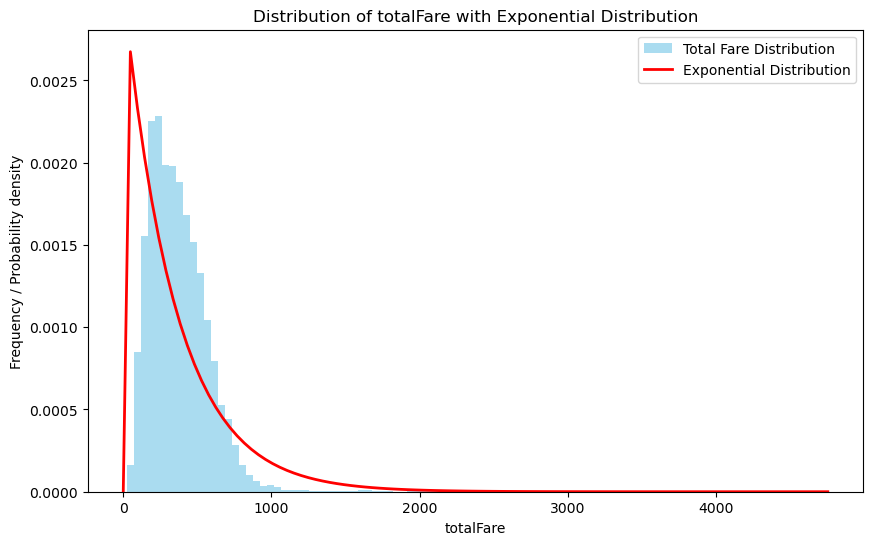

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Assuming df is the DataFrame containing 'totalFare'

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['totalFare'], bins=100, color='skyblue', alpha=0.7, density=True, label='Total Fare Distribution')

# Adding the exponential distribution curve
loc, scale = expon.fit(df['totalFare'])
x = np.linspace(0, df['totalFare'].max(), 100)
pdf = expon.pdf(x, loc, scale)
plt.plot(x, pdf, 'r', linewidth=2, label='Exponential Distribution')

plt.title('Distribution of totalFare with Exponential Distribution')
plt.xlabel('totalFare')
plt.ylabel('Frequency / Probability density')
plt.legend()
plt.show()


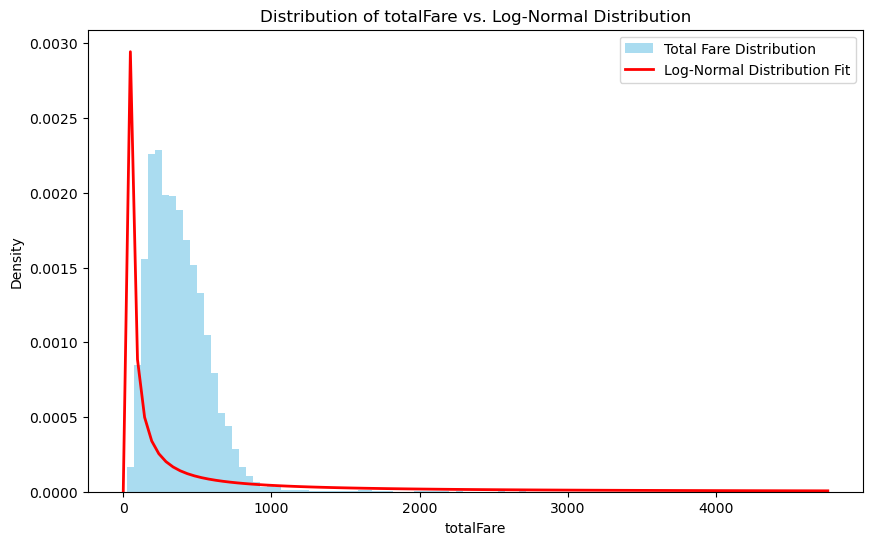

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Assuming df is the DataFrame containing 'totalFare'

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['totalFare'], bins=100, color='skyblue', alpha=0.7, density=True, label='Total Fare Distribution')

# Fitting a log-normal distribution to the data
shape, loc, scale = lognorm.fit(df['totalFare'])
x = np.linspace(0, df['totalFare'].max(), 100)
pdf = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf, 'r', linewidth=2, label='Log-Normal Distribution Fit')

plt.title('Distribution of totalFare vs. Log-Normal Distribution')
plt.xlabel('totalFare')
plt.ylabel('Density')
plt.legend()
plt.show()



C:\Users\ferra\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


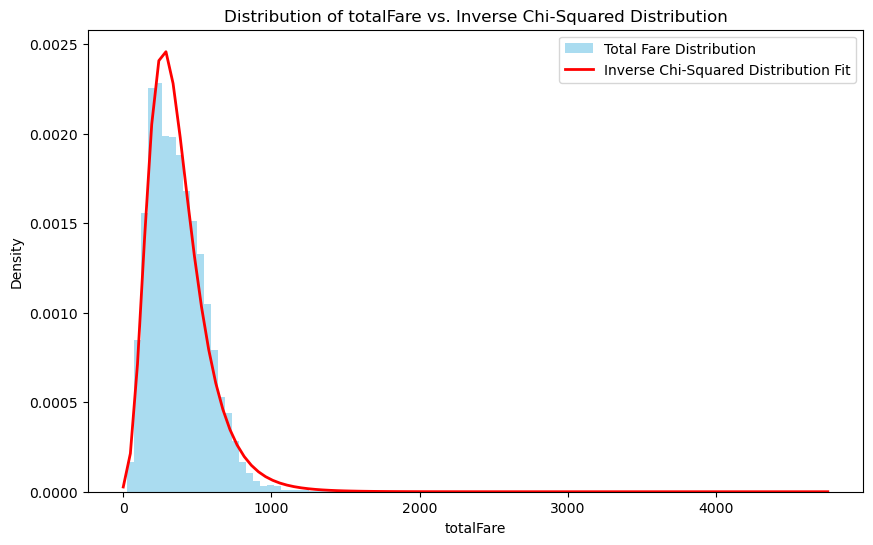

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma

# Assuming df is the DataFrame containing 'totalFare'

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['totalFare'], bins=100, color='skyblue', alpha=0.7, density=True, label='Total Fare Distribution')

# Fitting an inverse chi-squared distribution to the data
shape, loc, scale = invgamma.fit(df['totalFare'])
x = np.linspace(0, df['totalFare'].max(), 100)
pdf = invgamma.pdf(x, shape, loc, scale)
plt.plot(x, pdf, 'r', linewidth=2, label='Inverse Chi-Squared Distribution Fit')

plt.title('Distribution of totalFare vs. Inverse Chi-Squared Distribution')
plt.xlabel('totalFare')
plt.ylabel('Density')
plt.legend()
plt.show()


## KNN

#### KNN - 'n_neighbors': 5

_________________________________________________________________________________


Results for (KNeighborsRegressor)


_________________________________________________________________________________




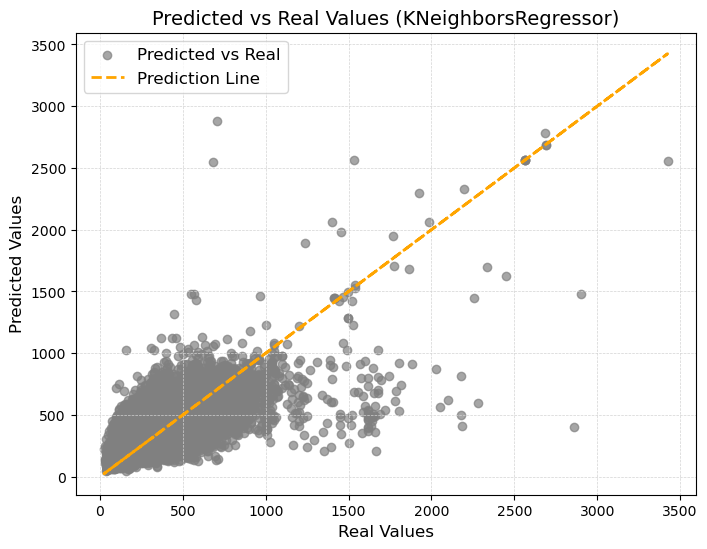

_________________________________________________________________________________


Test Squared Error (MSE) (KNeighborsRegressor): 19692.43


Test Root Mean Squared Error (RMSE) (KNeighborsRegressor): 140.33


Train Mean Squared Error (MSE) (KNeighborsRegressor): 13018.8


Train Root Mean Squared Error (RMSE) (KNeighborsRegressor): 114.1


_________________________________________________________________________________


In [113]:

# Try n_neighbors 5
hyperparameter_dictionary_knn = {'n_neighbors': 5}

# Call the function for KNN
evaluate_model(X_train, X_test, Y_train, Y_test, KNeighborsRegressor, hyperparameter_dictionary_knn)


#### KNN - hyerparameter tuning (K)

With Cross-validation

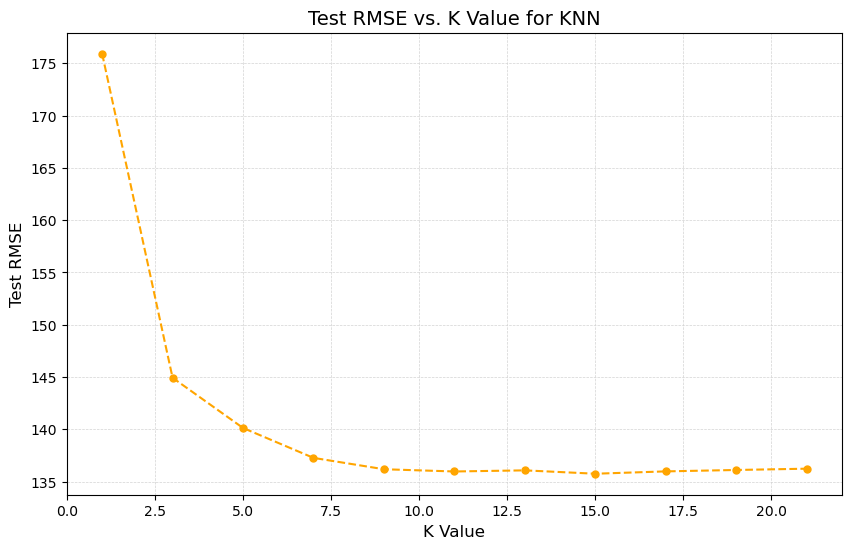

Lowest Test RMSE: 135.76 at K = 15


In [114]:

test_rmse_values = []
k_values = range(1, 22, 2)  # Only odd values from 1 to 21

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, Y_train)
    Y_pred_knn = knn_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_knn))
    test_rmse_values.append(test_rmse)

plt.figure(figsize=(10, 6))
plt.plot(k_values, test_rmse_values, marker='o', linestyle='--', color='orange', markersize=5)
plt.title('Test RMSE vs. K Value for KNN', fontsize=16)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Test RMSE', fontsize=12)
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)

# Replicate the design elements
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Test RMSE', fontsize=12)
plt.title('Test RMSE vs. K Value for KNN', fontsize=14)
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.show()

# Finding the lowest RMSE and its corresponding K value
min_rmse = min(test_rmse_values)
min_rmse_index = test_rmse_values.index(min_rmse)
optimal_k = k_values[min_rmse_index]

# Print the lowest RMSE and the corresponding K value
print(f"Lowest Test RMSE: {round(min_rmse, 2)} at K = {optimal_k}")



#### KNN - Best K

_________________________________________________________________________________


Results for (KNeighborsRegressor)


_________________________________________________________________________________




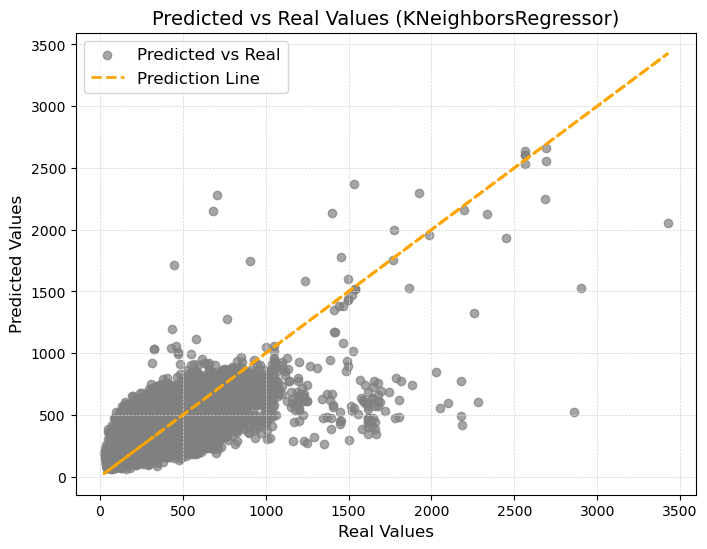

_________________________________________________________________________________


Test Squared Error (MSE) (KNeighborsRegressor): 18784.14


Test Root Mean Squared Error (RMSE) (KNeighborsRegressor): 137.06


Train Mean Squared Error (MSE) (KNeighborsRegressor): 16444.8


Train Root Mean Squared Error (RMSE) (KNeighborsRegressor): 128.24


_________________________________________________________________________________


In [115]:

# Try n_neighbors 5
hyperparameter_dictionary_knn = {'n_neighbors': optimal_k}

# Call the function for KNN
evaluate_model(X_train, X_test, Y_train, Y_test, KNeighborsRegressor, hyperparameter_dictionary_knn)


## Save the best model

In [116]:

# Create KNN model with optimal_k
knn_model = KNeighborsRegressor(n_neighbors=optimal_k)

# Train the model
knn_model.fit(X_train, Y_train)

# Save the model using joblib
joblib.dump(knn_model, r'C:\Users\ferra\OneDrive\Escritorio\Master Of Data Science\Advance Machine Learning\Advanced_ML_Ass3\Models\knn_model.pkl')


['C:\\Users\\ferra\\OneDrive\\Escritorio\\Master Of Data Science\\Advance Machine Learning\\Advanced_ML_Ass3\\Models\\knn_model.pkl']

## Summary of results

+-------------------+------------+------------+------------+------------+
| Model             | Train MSE  | Train RMSE | Test MSE   | Test RMSE  |
+-------------------+------------+------------+------------+------------+
| KNN (Best K)      | 16592.59   | 128.81     | 18709.32   | 136.78     |
| KNN (K=5)         | 12968.26   | 113.88     | 19680.59   | 140.29     |
| GLM Gamma         | 25853.4    | 160.79     | 25783.99   | 160.57     |
| Inverse Gamma GLM | 26614.27   | 163.14     | 26594.78   | 163.08     |
| Linear Regression | 26979.54   | 164.25     | 26827.62   | 163.79     |
+-------------------+------------+------------+------------+------------+



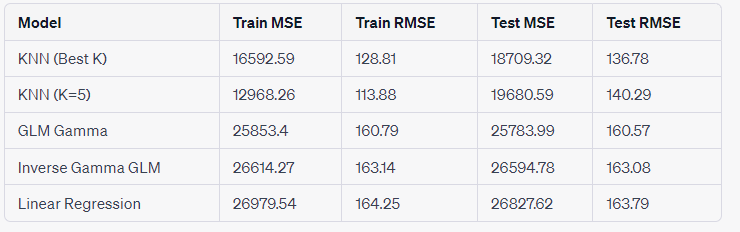

## Version for requirement.txt

In [117]:

import joblib
import pandas
import sklearn
import numpy

print("Joblib version:", joblib.__version__)
print("Pandas version:", pandas.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Numpy version:", numpy.__version__)


Joblib version: 1.1.1
Pandas version: 1.5.3
Scikit-learn version: 1.2.1
Numpy version: 1.23.5


## End of Part 2